In [4]:
# Install dependencies,
# Dependencies are other peoples code that help you get your work done, 
# you can use someone elses code to make it more convenient for
# yourself.
# If these things you depend on fail for some reason, you will have issues.
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# atp we have downloaded dependencies, but not included them in our
# projects code. By default they are excluded but when they are
# included you can then use them in their project.

# tensorflow is a library for working with ML/Deep Learning stuff.
# 'as tf' means were going to use the alias tf.<whatever> to use 
# tensorflow code (for convenience). 
import tensorflow as tf

# os package contains utilities for working with your operating system
# (file system related things mainly in our use case).
import os

2025-04-26 15:32:10.232992: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-26 15:32:10.300024: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 15:32:10.619136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-26 15:32:10.619308: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-26 15:32:10.674785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [5]:
tf.config.experimental.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [15]:
# Base directory where the images are
imgs_dir_path = "/media/mfennelly/backup_2tb"

# Paths for 'Grass' and 'Mines'
grass_imgs_path = os.path.join(imgs_dir_path, "Grass")
mines_imgs_path = os.path.join(imgs_dir_path, "Mines")

mine_photos = os.listdir(mines_imgs_path)

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory(
    imgs_dir_path,
    class_names=['Grass', 'Mines'],  # <-- only load these two folders
    label_mode='int'  # optional, makes labels integers
)

Found 343 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

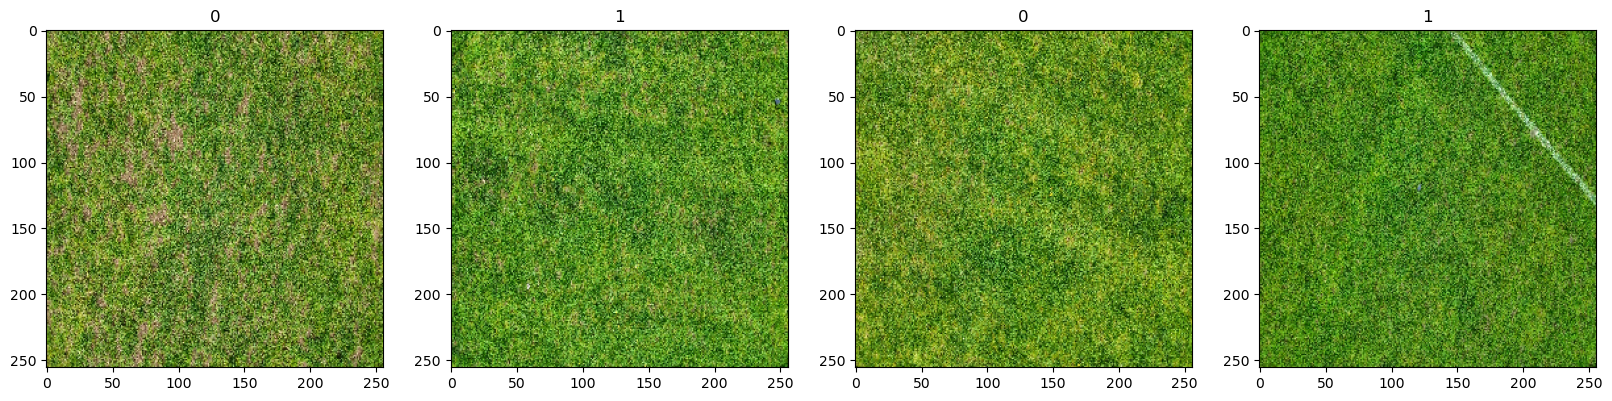

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training

In [30]:
logdir=mines_imgs_path = os.path.join(imgs_dir_path, "logs")

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2025-04-26 18:52:48.789890: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 63 of 256
2025-04-26 18:53:09.201442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 189 of 256
2025-04-26 18:53:18.754201: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


7/7 [==============================] - 55s 2s/step - loss: 0.7392 - accuracy: 0.5446 - val_loss: 0.6816 - val_accuracy: 0.4688
Epoch 2/20
7/7 [==============================] - 4s 435ms/step - loss: 0.6434 - accuracy: 0.6250 - val_loss: 0.5748 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 5s 479ms/step - loss: 0.5856 - accuracy: 0.6830 - val_loss: 0.5623 - val_accuracy: 0.6562
Epoch 4/20
7/7 [==============================] - 4s 439ms/step - loss: 0.4576 - accuracy: 0.7946 - val_loss: 0.4424 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 4s 436ms/step - loss: 0.4456 - accuracy: 0.8080 - val_loss: 0.3538 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 4s 441ms/step - loss: 0.4390 - accuracy: 0.7857 - val_loss: 0.3960 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 4s 437ms/step - loss: 0.4464 - accuracy: 0.7991 - val_loss: 0.4101 - val_accuracy: 0.6875
Epoch 8/20
7/7 [=================

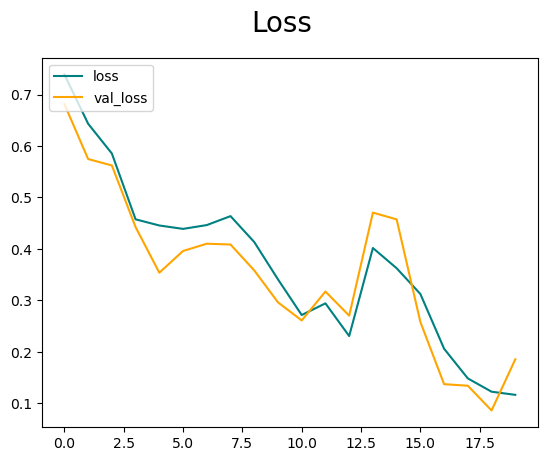

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

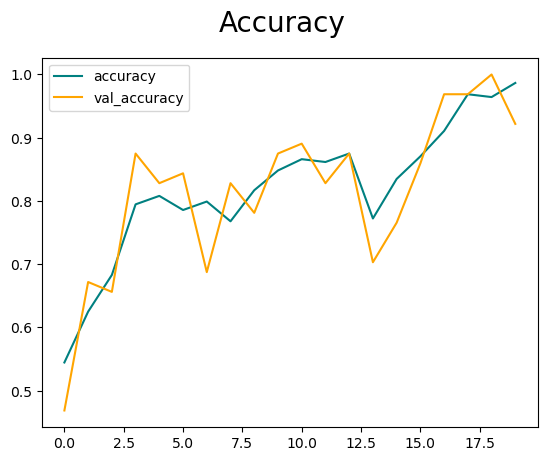

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 85ms/step


In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))
